# 영화 종류에 따른 관객의 몰림 및 문화 활성 정도 분석

## - 영화 대표 국가, 스크린 수, 개봉일

* 학번 : 2025105447
* 학과 : 인공지능학과
* 학년 : 1
* 이름 : 이동주

## 목차

 1. 주제 선정 이유
 2. 가설 정의
 3. 데이터 출처
 4. 데이터 내용

## 1. 주제 선정 이유

- 영화관에 사람이 얼마나 몰릴지 예측하는 문제는 굉장히 중요하다. 특히, 겨울왕국2 와 같이 많은 사람들이 보는 영화는 너무 일찍 영화관에 가면 인파에 쏠리게 되고, 너무 늦으면 스포일러를 당하고 만다. 따라서, 영화 종류에 따른 관객의 몰림을 분석해보고자 한다.
- 또한, 영화도 문화의 일부로서 소설을 대체할 수 있는 요소인지 분석하기 위해 문화 활성도 또한 분석하고자 한다.

## 2. 가설 정의

- **가설 1** : 국내보다는 해외 영화가 총 시청자 수가 더 많을 것이다.

- **가설 2** : 총 시청자 수는 봄, 가을보다 여름, 겨울에 더 많을 것이다.

- **가설 3** : 총 시청자 수가 많은 영화일수록 영화 개봉 후 한달간 문화 영화 관람 활성 지수의 종합점수가 높을 것이다.

## 3. 데이터 출처

1. **문화 영화 관람 활성 지수**
    - **제공 기관** : 문화 빅데이터 플랫폼
    - **자료갱신일** : 2019-2024 매년 갱신 데이터를 종합함
    - **파일 확장자** : csv
    - **데이터 출처** : [링크](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=f8f32401-b44d-413e-81f0-afcfbc6f5f64)


2. **영화 관람 데이터**
    - **제공 기관** : 문화 빅데이터 플랫폼
    - **자료갱신일** : 2023.02.22
    - **파일 확장자** : csv
    - **데이터 출처** : [링크](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=774e1600-b1b0-11ed-aef0-e35816fab8bc)


3. **역대 박스 오피스 내역**
    - **제공 기관** : 영화관입장권통합전산망
    - **자료갱신일** : 2025.04
    - **파일 확장자** : xls
    - **데이터 출처** : [링크](https://www.kobis.or.kr/kobis/business/stat/offc/findFormerBoxOfficeList.do)


## 4. 데이터 내용

In [1]:
%pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
culture_df = pd.read_csv("./문화영화관람활성지수.csv", encoding='utf-8')
box_offices_df = pd.read_csv("./역대박스오피스내역.csv", encoding='utf-8')
movie_view_df = pd.read_csv("./영화관람데이터.csv", encoding='utf-8')

In [4]:
culture_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준년월       1170 non-null   int64  
 1   기준년        1170 non-null   int64  
 2   기준월        1170 non-null   int64  
 3   시도코드       1170 non-null   int64  
 4   시도명        1170 non-null   object 
 5   상영영화수      1170 non-null   int64  
 6   영화관람객수     1170 non-null   int64  
 7   지출금액       1170 non-null   float64
 8   인구당영화관람객수  1170 non-null   float64
 9   영화관람객수점수   1170 non-null   float64
 10  지출금액점수     1170 non-null   float64
 11  종합점수       1170 non-null   float64
 12  기준상영영화수    1170 non-null   float64
 13  기준영화관람객수   1170 non-null   float64
 14  기준지출금액     1170 non-null   float64
dtypes: float64(8), int64(6), object(1)
memory usage: 137.2+ KB


In [5]:
box_offices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   순위          500 non-null    int64 
 1   영화명         500 non-null    object
 2   개봉일         500 non-null    object
 3   매출액         492 non-null    object
 4   Unnamed: 4  2 non-null      object
 5   관객수         500 non-null    object
 6   Unnamed: 6  101 non-null    object
 7   스크린수        500 non-null    object
 8   대표국적        500 non-null    object
 9   국적          500 non-null    object
 10  배급사         499 non-null    object
dtypes: int64(1), object(10)
memory usage: 43.1+ KB


In [6]:
movie_view_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년도        3689 non-null   int64  
 1   기준분기        3689 non-null   int64  
 2   기준월         3689 non-null   int64  
 3   기준일         3689 non-null   int64  
 4   월주차수        3689 non-null   int64  
 5   주차수         3689 non-null   int64  
 6   시도명         3689 non-null   object 
 7   한국영화관람객수    3689 non-null   int64  
 8   해외영화관람객수    3689 non-null   int64  
 9   영화관람객수      3689 non-null   int64  
 10  한국영화매출금액    3689 non-null   int64  
 11  해외영화매출금액    3689 non-null   int64  
 12  영화매출금액      3689 non-null   int64  
 13  일평균한국영화상영수  3689 non-null   float64
 14  일평균해외영화상영수  3689 non-null   float64
 15  일평균영화상영수    3689 non-null   int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 461.2+ KB


In [7]:
box_offices_df.head()

,순위,영화명,개봉일,매출액,Unnamed: 4,관객수,Unnamed: 6,스크린수,대표국적,국적,배급사
0,1,명량,7/30/14,"135,748,398,910",NaN,"17,613,682",NaN,"1,587",한국,한국,(주)씨제이이엔엠
1,2,극한직업,1/23/19,"139,647,979,516",NaN,"16,264,944",NaN,"1,978",한국,한국,(주)씨제이이엔엠
2,3,신과함께-죄와 벌,12/20/17,"115,698,654,137",NaN,"14,410,754",NaN,"1,912",한국,한국,롯데쇼핑㈜롯데엔터테인먼트
3,4,국제시장,12/17/14,"110,913,469,630",NaN,"14,257,115",NaN,966,한국,한국,(주)씨제이이엔엠
4,5,어벤져스: 엔드게임,4/24/19,"122,182,694,160",NaN,"13,934,592",NaN,"2,835",미국,미국,월트디즈니컴퍼니코리아 유한책임회사


## 5. 데이터 전처리

다른 도시들의 문화영화관람활성지수는 필요 없으니 "시도명"이 "전국"인 경우로 좁혀준다.

In [8]:
culture_df = culture_df[culture_df["시도명"] == "전국"]
culture_df.head()

,기준년월,기준년,기준월,시도코드,시도명,상영영화수,영화관람객수,지출금액,인구당영화관람객수,영화관람객수점수,지출금액점수,종합점수,기준상영영화수,기준영화관람객수,기준지출금액
0,201901,2019,1,0,전국,370,18122443,1.511615e+11,349.67666,137.52270,108.25541,122.88905,234.58333,2410351.25,2.554051e+10
18,201902,2019,2,0,전국,318,22277733,1.899908e+11,429.82696,169.04464,136.05478,152.54971,234.58333,2410351.25,2.554051e+10
36,201903,2019,3,0,전국,376,14671693,1.265590e+11,283.05604,111.32178,90.62413,100.97296,234.58333,2410351.25,2.554051e+10
54,201904,2019,4,0,전국,437,13338962,1.131847e+11,257.32629,101.20265,81.04165,91.12215,234.58333,2410351.25,2.554051e+10
72,201905,2019,5,0,전국,460,18062457,1.545630e+11,348.42475,137.03034,110.66143,123.84588,234.58333,2410351.25,2.554051e+10


영화 관람 데이터가 지역을 기준으로 반복되고 있다.

지역마다의 관람양은 별로 중요하지 않으니 합쳐서 하나의 시계열 데이터로 수정한다.

그리고 이후 다른 데이터와 통합하기 유용하도록 시간도 datetime 기준으로 형태를 맞춘다.

In [9]:
movie_view_mod_df = movie_view_df.groupby(['기준년도', '기준분기', '기준월', '기준일']).agg({
    '한국영화관람객수': 'sum',
    '해외영화관람객수': 'sum',
    '영화관람객수': 'sum'
}).reset_index()

movie_view_mod_df['날짜'] = pd.to_datetime(movie_view_mod_df[['기준년도', '기준월', '기준일']].astype(str).agg('-'.join, axis=1))
movie_view_df = movie_view_mod_df.drop(columns=['기준년도', '기준월', '기준일', '기준분기'])

movie_view_df

,한국영화관람객수,해외영화관람객수,영화관람객수,날짜
0,1076144,2770108,3846252,2019-01-06
1,2240519,1426651,3667170,2019-01-13
2,2170649,1136494,3307143,2019-01-20
3,4127645,524562,4652207,2019-01-27
4,5748632,807858,6556490,2019-02-03
...,...,...,...,...
212,1403630,1651383,3055013,2023-01-29
213,430232,1046142,1476374,2023-02-05
214,285513,1158649,1444162,2023-02-12
215,161975,1733562,1895537,2023-02-19


시계열 데이터 2개를 동시에 시각화하기 위해 시간을 같은 형태로 맞춰준다.

In [10]:
box_offices_df['개봉일'] = pd.to_datetime(box_offices_df['개봉일'], format='%m/%d/%y')

culture_df['기준년월'] = pd.to_datetime(culture_df['기준년월'], format='%Y%m')

print(box_offices_df['개봉일'].head())
print(culture_df['기준년월'].head())

0   2014-07-30
1   2019-01-23
2   2017-12-20
3   2014-12-17
4   2019-04-24
Name: 개봉일, dtype: datetime64[ns]
0    2019-01-01
18   2019-02-01
36   2019-03-01
54   2019-04-01
72   2019-05-01
Name: 기준년월, dtype: datetime64[ns]


문화영화관람활성지수의 연도와 맞추기 위해 역대박스오피스내역의 영화 중 19년도 미만, 24년 5월 초과의 영화는 삭제한다.

In [11]:
box_offices_df = box_offices_df[box_offices_df['개봉일'] >= pd.to_datetime('2019-01-01')]
box_offices_df = box_offices_df[box_offices_df['개봉일'] <= pd.to_datetime('2024-05-01')]

box_offices_df

,순위,영화명,개봉일,매출액,Unnamed: 4,관객수,Unnamed: 6,스크린수,대표국적,국적,배급사
1,2,극한직업,2019-01-23,"139,647,979,516",NaN,"16,264,944",NaN,"1,978",한국,한국,(주)씨제이이엔엠
4,5,어벤져스: 엔드게임,2019-04-24,"122,182,694,160",NaN,"13,934,592",NaN,"2,835",미국,미국,월트디즈니컴퍼니코리아 유한책임회사
5,6,겨울왕국 2,2019-11-21,"114,810,421,450",NaN,"13,747,792",NaN,"2,648",미국,미국,월트디즈니컴퍼니코리아 유한책임회사
8,9,서울의 봄,2023-11-22,"127,926,951,712",NaN,"13,128,080",NaN,"2,328",한국,한국,메가박스중앙(주) 플러스엠 엔터테인먼트
13,14,범죄도시2,2022-05-18,"131,295,679,478",NaN,"12,693,175",NaN,"2,498",한국,한국,"주식회사 에이비오엔터테인먼트,메가박스중앙(주) 플러스엠 엔터테인먼트"
...,...,...,...,...,...,...,...,...,...,...,...
487,488,그대들은 어떻게 살 것인가,2023-10-25,"19,608,939,412",NaN,"2,015,965",NaN,"1,733",일본,일본,메가박스중앙(주)
495,496,천문: 하늘에 묻는다,2019-12-26,"16,502,543,020",NaN,"2,000,490",NaN,"1,198",한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
496,497,테넷,2020-08-26,"18,464,298,170",NaN,"1,998,987",NaN,"2,228",미국,미국,워너브러더스 코리아(주)
498,499,크루엘라,2021-05-26,"19,252,879,640",NaN,"1,983,397",NaN,"1,184",미국,미국,월트디즈니컴퍼니코리아 유한책임회사


## 6. 가설 증명

In [12]:
%pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


나눔고딕 폰트를 설치 후 사용하는 코드 (설치가 안됐을 경우, 시스템에서 나눔고딕이라는 이름을 가진 폰트를 사용)

In [13]:
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_path = './NanumGothic.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

font_paths = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
for font in font_paths:
    if 'NanumGothic' in font:
        font_prop = font_manager.FontProperties(fname=font)
        plt.rcParams['font.family'] = font_prop.get_name()
        break


### 가설 1 : 국내보다는 해외 영화가 총 시청자 수가 더 많을 것이다.

이를 검증하기 위해 영화관람데이터의 **한국영화관람객수**와 **해외영화관람객수** 열을 활용한다.

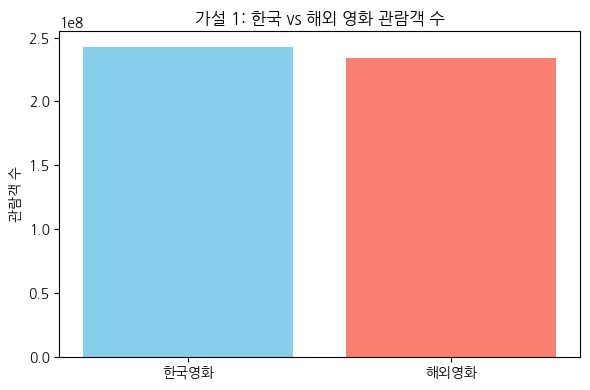

In [14]:
# nanum gothic font

total_kor = movie_view_df["한국영화관람객수"].sum()
total_for = movie_view_df["해외영화관람객수"].sum() 

plt.figure(figsize=(6, 4))
plt.bar(["한국영화", "해외영화"], [total_kor, total_for], color=['skyblue', 'salmon'])
plt.title("가설 1: 한국 vs 해외 영화 관람객 수")
plt.ylabel("관람객 수")
plt.tight_layout()
plt.show()

시각화 결과 **가설 1번은 거짓**이었다.

역대 박스오피스 내역을 참고할때, 순위권의 영화 대부분이 국내 역사 혹은 소설 원작 영화들이었다.

이는 **국내 역사를 영화로 시청하는 것을 사람들이 즐기고**, 이를 적절히 활용하면 *역사 교육에 큰 도움* 이 될 것이라 생각한다.

### 가설 2 : 총 시청자 수는 봄, 가을보다 여름, 겨울에 더 많을 것이다.

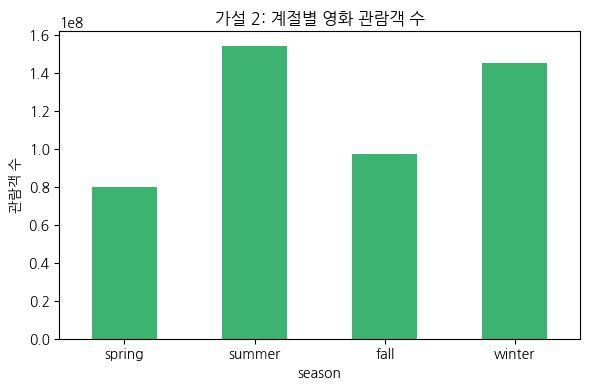

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = movie_view_df


df['개봉일'] = pd.to_datetime(df['날짜'])

def parse_month(date):
    try:
        return date.month
    except:
        return None

def get_season(month):
    if month in [3, 4, 5]: return 'spring'
    elif month in [6, 7, 8]: return 'summer'
    elif month in [9, 10, 11]: return 'fall'
    elif month in [12, 1, 2]: return 'winter'
    else: return 'unknown'

df['month'] = df['개봉일'].apply(parse_month)
df['season'] = df['month'].apply(get_season)

df['관객수'] = df['영화관람객수'].astype(str).str.replace(",", "").astype(float)

season_group = df.groupby('season')['관객수'].sum().reindex(['spring', 'summer', 'fall', 'winter'])

plt.figure(figsize=(6, 4))
season_group.plot(kind='bar', color='mediumseagreen')
plt.title("가설 2: 계절별 영화 관람객 수")
plt.ylabel("관람객 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


시각화 결과 **가설 2는 참**이다.

특히, 봄보다 여름이 2배 정도 많이 몰리는 것을 보아 여름에 영화를 개봉하는 것이 좋아보인다.

In [16]:
culture_df

,기준년월,기준년,기준월,시도코드,시도명,상영영화수,영화관람객수,지출금액,인구당영화관람객수,영화관람객수점수,지출금액점수,종합점수,기준상영영화수,기준영화관람객수,기준지출금액
0,2019-01-01,2019,1,0,전국,370,18122443,1.511615e+11,349.67666,137.52270,108.25541,122.88905,234.58333,2410351.25,2.554051e+10
18,2019-02-01,2019,2,0,전국,318,22277733,1.899908e+11,429.82696,169.04464,136.05478,152.54971,234.58333,2410351.25,2.554051e+10
36,2019-03-01,2019,3,0,전국,376,14671693,1.265590e+11,283.05604,111.32178,90.62413,100.97296,234.58333,2410351.25,2.554051e+10
54,2019-04-01,2019,4,0,전국,437,13338962,1.131847e+11,257.32629,101.20265,81.04165,91.12215,234.58333,2410351.25,2.554051e+10
72,2019-05-01,2019,5,0,전국,460,18062457,1.545630e+11,348.42475,137.03034,110.66143,123.84588,234.58333,2410351.25,2.554051e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2024-01-01,2024,1,0,전국,323,7748726,7.465969e+10,151.00634,59.38858,54.00197,56.69528,234.58333,2410351.25,2.554051e+10
1098,2024-02-01,2024,2,0,전국,292,11458765,1.105495e+11,223.35168,87.84094,79.97729,83.90911,234.58333,2410351.25,2.554051e+10
1116,2024-03-01,2024,3,0,전국,373,11697016,1.165768e+11,228.03897,89.68438,84.35377,87.01908,234.58333,2410351.25,2.554051e+10
1134,2024-04-01,2024,4,0,전국,385,9334807,8.995801e+10,182.01773,71.58490,65.10386,68.34438,234.58333,2410351.25,2.554051e+10


### 가설 3 : 총 시청자 수가 많은 영화일수록 영화 개봉 후 한달간 문화 영화 관람 활성 지수의 종합점수가 높을 것이다.

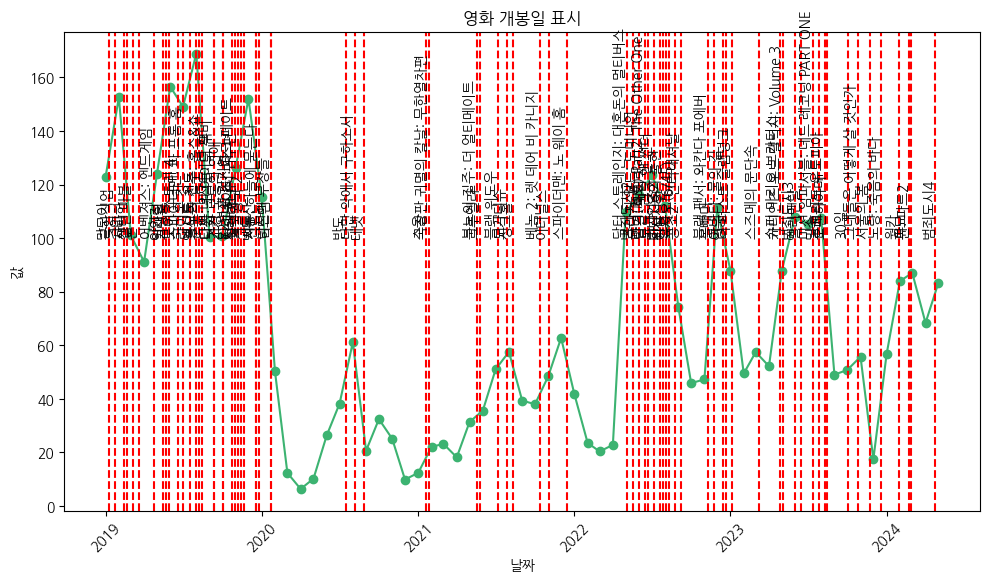

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(culture_df['기준년월'], culture_df['종합점수'], marker='o', color='mediumseagreen', label='영화관람객수')


for index, row in box_offices_df.iterrows():
    plt.axvline(x=row['개봉일'], color='red', linestyle='--')
    plt.text(row['개봉일'], 100, row['영화명'], rotation=90, verticalalignment='bottom', horizontalalignment='right')


plt.title('영화 개봉일 표시')
plt.xlabel('날짜')
plt.ylabel('값')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


박스 오피스 영화가 너무 많아 보기 힘드니, 가장 시청자 수가 많은 20개의 영화만 남기고 다시 시각화 한다.

그리고 글씨도 읽기 힘드니 조금 회전시키며, 1달 뒤를 파란색 선으로 명확히 남긴다.

In [18]:
box_offices_df = box_offices_df.head(20)

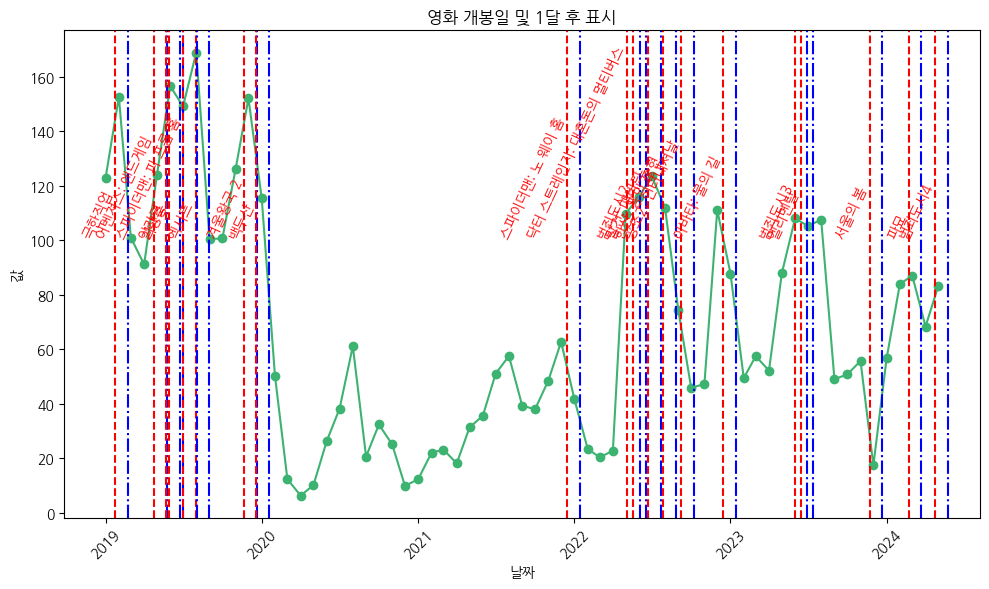

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(culture_df['기준년월'], culture_df['종합점수'], marker='o', color='mediumseagreen', label='영화관람객수')


for index, row in box_offices_df.iterrows():
    
    plt.axvline(x=row['개봉일'], color='red', linestyle='--')
    
    
    one_month_later = row['개봉일'] + pd.DateOffset(months=1)
    
    
    plt.axvline(x=one_month_later, color='blue', linestyle='-.')
    
    
    plt.text(row['개봉일'], 100, row['영화명'], rotation=65, verticalalignment='bottom', horizontalalignment='right', color='red')


plt.title('영화 개봉일 및 1달 후 표시')
plt.xlabel('날짜')
plt.ylabel('값')


plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


여전히 보기 힘드니 박스오피스 영화의 (1달 후 종합 점수) - (개봉일에서 가장 가까운 날짜 종합 점수)의 값을 각 영화마다 막대그래프로 나태내본다.

/var/folders/m8/81vskj395s75s7_8jhf3t4kw0000gn/T/ipykernel_54940/2829526612.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nanum Gothic.
  plt.tight_layout()
/Users/galesky/Documents/2025/khu_web-python-programming/term project/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nanum Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


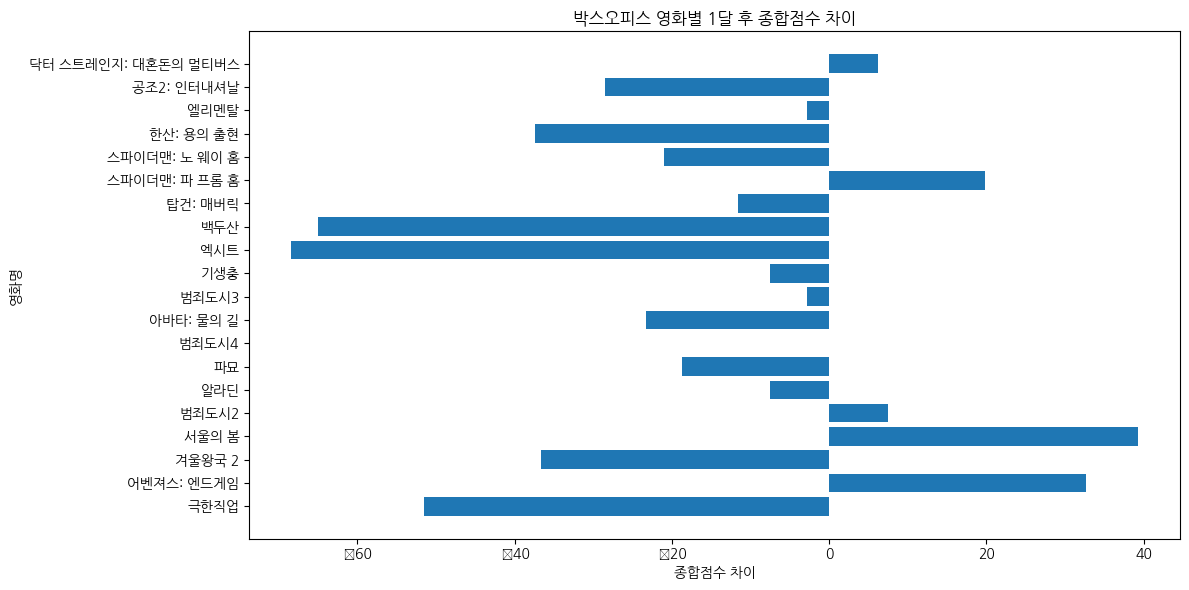

In [20]:
score_diff = []
movies = []


for index, row in box_offices_df.iterrows():
    
    movie_name = row['영화명']
    release_date = row['개봉일']
    
    
    culture_df['date_diff'] = (culture_df['기준년월'] - release_date).abs()  
    closest_date_row = culture_df.loc[culture_df['date_diff'].idxmin()]  # 가장 작은 차이를 가지는 행
    
    
    score_at_release = closest_date_row['종합점수']
    
    
    one_month_later = release_date + pd.DateOffset(months=1)
    
    
    culture_df['date_diff_later'] = (culture_df['기준년월'] - one_month_later).abs()
    closest_date_row_later = culture_df.loc[culture_df['date_diff_later'].idxmin()]
    score_one_month_later = closest_date_row_later['종합점수']
    
    
    if pd.notna(score_at_release) and pd.notna(score_one_month_later):
        score_diff.append(score_one_month_later - score_at_release)
        movies.append(movie_name)  


plt.figure(figsize=(12, 6))


plt.barh(movies, score_diff)  


plt.title('박스오피스 영화별 1달 후 종합점수 차이')
plt.xlabel('종합점수 차이')
plt.ylabel('영화명')


plt.tight_layout()


plt.show()


시각화 결과 **가설 3은 거짓**이다.

추측되는 이유는 없다. 예상컨데, 1달 뒤엔 영화관에서 대부분 영화를 내리기 때문이 아닐까..

## 7. 결론

이번 분석 결과는 영화 산업 종사자에게 큰 의미를 제공하는 듯 하다.

첫째, 현재 국내 영화의 경쟁력을 바탕으로 이를 지속적으로 강화하고, 한국적 소재와 정서를 반영한 콘텐츠 개발을 장려해야 한다.

둘째, 계절별 관객 분포를 고려한 개봉 전략과 마케팅이 필요하며, 비수기에는 다양한 시도를 통해 관객 저변을 확대할 필요가 있다.

셋째, 문화 활성화를 위해서는 단순히 흥행작에 의존하기보다는, 다양한 영화 경험을 제공할 수 있는 정책적 지원과 문화 인프라 확충이 병행되어야 한다.

결론적으로, 이번 프로젝트는 데이터 기반의 영화 산업 분석을 통해 관객의 행동 양상과 문화 활성화의 조건을 구체적으로 파악하였으며, 앞으로도 이러한 데이터 분석이 영화 산업의 발전과 문화 정책 수립에 중요한 역할을 할 것으로 기대된다.

## 부록 : References

- 한글 폰트 설정 : [https://simon-yoon.tistory.com/149](https://wikidocs.net/141543)
- graph에 텍스트 삽입 튜토리얼 : [https://wikidocs.net/141543](https://wikidocs.net/141543)
- pandas 시계열 데이터 처리 : [https://pandas.pydata.org/docs/user_guide/timeseries.html](https://pandas.pydata.org/docs/user_guide/timeseries.html)